<a href="https://colab.research.google.com/github/bec2148/mnist-finalproject/blob/main/MNIST_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [334]:
from keras.datasets import mnist        # MNIST dataset is included in Keras
from keras.models import Sequential     # Model type to be used

from keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
from keras import utils                 # Keras utilities

In [335]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Conv3D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization


In [336]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [337]:
# We do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
print(type(X_train))
print(type(X_test))
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


Training matrix shape (60000, 28, 28, 2)
Training matrix shape (60000, 28, 28, 2)
Testing matrix shape (10000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 2)


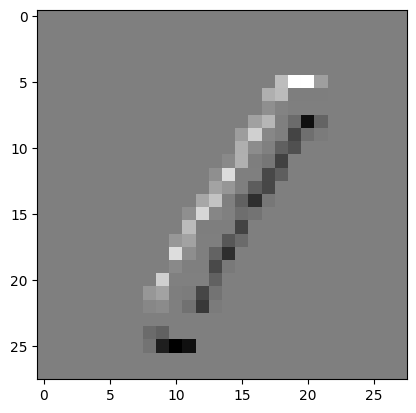

In [338]:
# padded_array = np.pad(array, ((1, 1), (0, 1)), mode='constant')
# don't need padding on the left
padded_X_train = np.pad(X_train, pad_width=((0, 0), (1, 1), (1, 1), (0, 0)), mode='constant', constant_values=0)
# ur = array[:, :] - padded_array[0:3, 1:4]
ur = X_train[:, :, :, :] - padded_X_train[:, 0:28, 1:29, :]
plt.figure()
plt.imshow(X_train[3].reshape(28,28), cmap='gray', interpolation='none')
plt.imshow(ur[3].reshape(28,28), cmap='gray', interpolation='none')
combined_X_train = np.concatenate((X_train, ur), axis=-1)
print("Training matrix shape", combined_X_train.shape)
combined_X_train = combined_X_train.reshape(60000, 28, 28, 2)
print("Training matrix shape", combined_X_train.shape)

print("Testing matrix shape", X_test.shape)
X_test = np.repeat(X_test, 2, axis=-1)
X_test = X_test.reshape(10000, 28, 28, 2)
print("Testing matrix shape", X_test.shape)



In [339]:
# one-hot format classes

nb_classes = 10 # number of unique digits

Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

In [340]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 2))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [341]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)                   │ (None, 26, 26, 16)          │             304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_87               │ (None, 26, 26, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_104 (Activation)          │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_88               │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_105 (Activation)          │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_89               │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_106 (Activation)          │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_90               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_107 (Activation)          │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_91               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_108 (Activation)          │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 512)                 │              

 Total params: 593,050 (2.26 MB)

 Trainable params: 591,674 (2.26 MB)

 Non-trainable params: 1,376 (5.38 KB)

In [342]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [343]:
# Create an ImageDataGenerator for data augmentation, applying random rotations,
# shifts, shearing, and zooming to enhance training dataset variability.
gen = ImageDataGenerator()

# ImageDataGenerator but without any parameters, so won't apply transformations
test_gen = ImageDataGenerator()

In [344]:
#### # train_generator = gen.flow(X_train, Y_train, batch_size=128)
# train_generator = gen.flow(combined_X_train, Y_train, batch_size=128)
# test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [345]:
# model.fit(train_generator, steps_per_epoch=60000//128, epochs=3, verbose=1, validation_data=test_generator, validation_steps=10000//128)
model.fit(combined_X_train, Y_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.9427 - loss: 0.1882 - val_accuracy: 0.8109 - val_loss: 0.5747
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9916 - loss: 0.0280 - val_accuracy: 0.8434 - val_loss: 0.5341
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9933 - loss: 0.0215 - val_accuracy: 0.9328 - val_loss: 0.1928
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9958 - loss: 0.0139 - val_accuracy: 0.9550 - val_loss: 0.1349
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9962 - loss: 0.0120 - val_accuracy: 0.9293 - val_loss: 0.2184


In [346]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9212 - loss: 0.2488
Test score: 0.2183588445186615
Test accuracy: 0.9293000102043152
